In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("resources/resources/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 1400x500 with 0 Axes>

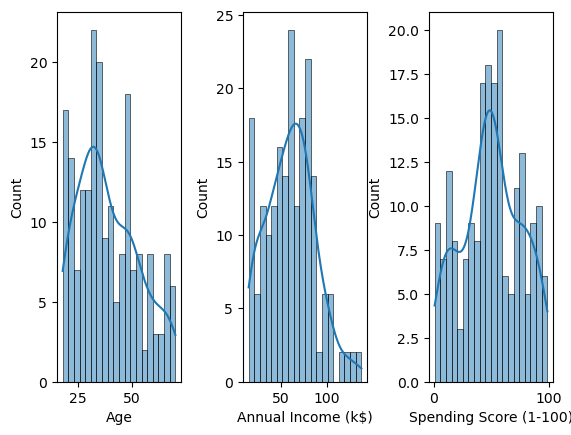

In [8]:
plt.figure(figsize=(14,5))
fig,ax = plt.subplots(1,3)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
y=0
for col in df.columns[2:]:
    sns.histplot(df[col],bins=20,kde=True,ax=ax[y])
    y+=1

<AxesSubplot: title={'center': 'Cinsiyet Adet Grafiği'}, xlabel='count', ylabel='Gender'>

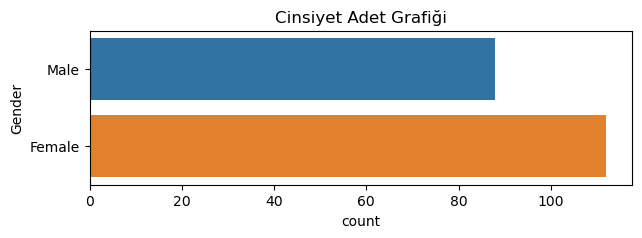

In [11]:
plt.figure(figsize=(7,2))
plt.title("Cinsiyet Adet Grafiği")
sns.countplot(y="Gender",data=df)

<Figure size 2000x1000 with 0 Axes>

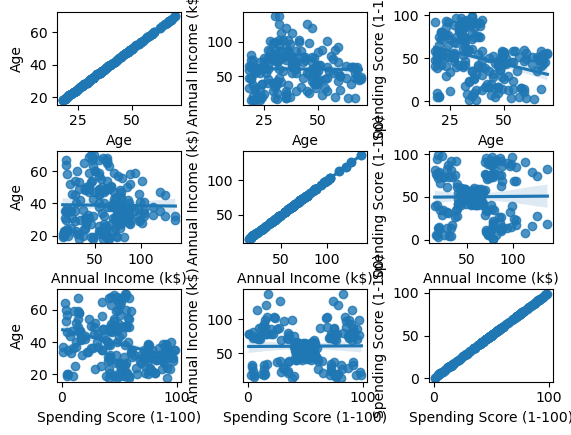

In [13]:
plt.figure(figsize=(20,10))
fig,ax = plt.subplots(3,3)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
x=0
for first in df.columns[2:]:
    y=0
    for second in df.columns[2:]:
        sns.regplot(x=first,y=second,data=df,ax=ax[x,y])
        y+=1
    x+=1
    

<AxesSubplot: >

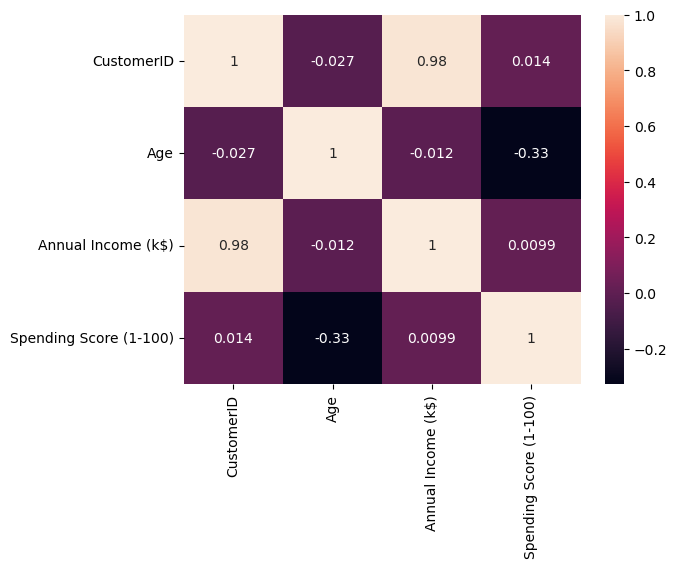

In [14]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='Age', ylabel='Annual Income (k$)'>

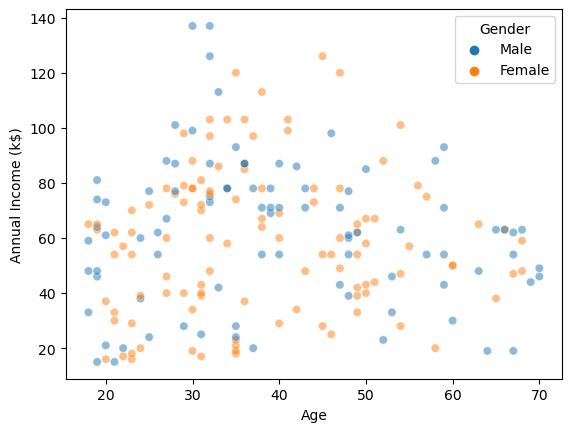

In [15]:
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df,hue="Gender",alpha=0.5)

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
X = df[df.columns[2:]]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [19]:
uzaklik = []
for n in range(1,11):
    model = KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=42)
    model.fit(X)
    uzaklik.append(model.inertia_)

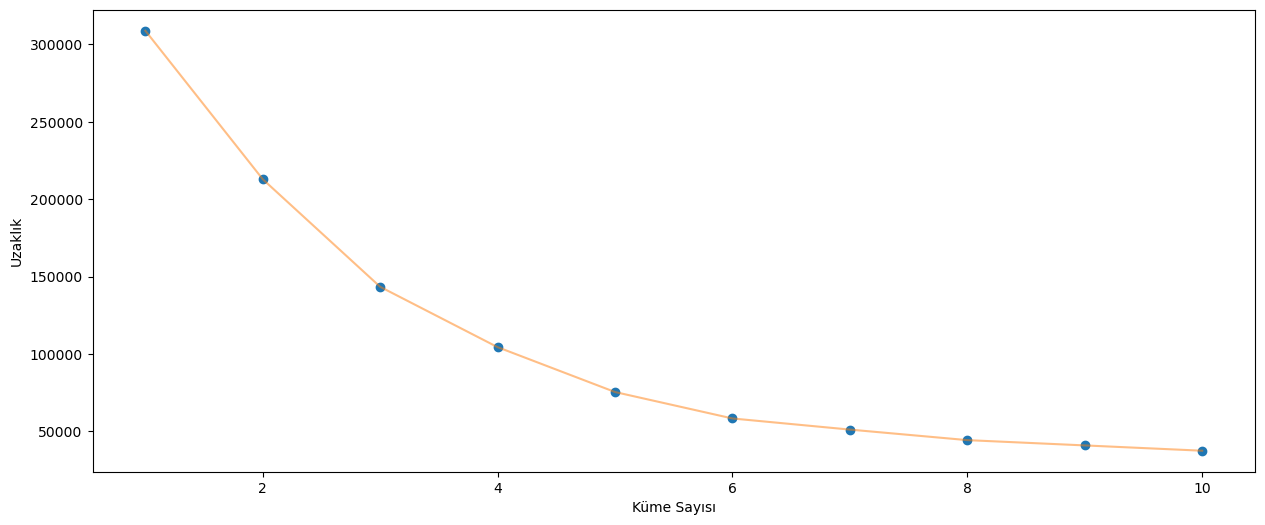

In [22]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),uzaklik,'o')
plt.plot(np.arange(1,11),uzaklik,'-',alpha=0.5)
plt.xlabel('Küme Sayısı'),plt.ylabel('Uzaklık')
plt.show()

In [23]:
model = (KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=42,algorithm='elkan'))
model.fit(X)
new_labels = model.labels_
merkezler = model.cluster_centers_

In [24]:
new_labels

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [25]:
merkezler

array([[40.39473684, 87.        , 18.63157895],
       [44.89473684, 48.70526316, 42.63157895],
       [24.82142857, 28.71428571, 74.25      ],
       [32.69230769, 86.53846154, 82.12820513]])